# Visualizing the OLS cost function, L1, L2 constraints

Starter code for the Q3

#### Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

#### Creating the data set

In [2]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

#### Helper functions

In [3]:
''' Complete the cell '''
#### HINT: Write the closed form function for OLS, Ridge and coordinate descent function for Lasso 
#### Each function must depend on the variable lambda
def ridge_regression(x, y, lamda = 0.01): 
    I = np.eye((x.shape[1]))
    inv = np.linalg.inv(np.matmul(x.T, x) + lamda * I)
    temp = np.matmul(inv, x.T)
    return  np.matmul(temp,y)

def costfunction(X,y,theta): 
    """OLS"""
    t = np.matmul(X,theta) - y
    return  float((1./(2*np.size(y))) * np.matmul((t).T,(t)));   

def cost_l1(X,Y):
    return np.abs(X) + np.abs(Y)   

def cost_l2(X,Y):
    return np.square(X) + np.square(Y)

#### Computing the Ridge regularization solutions as a function of $\lambda$

In [4]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the ridge regression function
#### and store optimal w for each lambda
ridge_l2_w0 = []
ridge_l2_w1 = []
lambda_range = np.logspace(0,4,num = 100)/1000

for l in lambda_range:
    w0_ridge, w1_ridge = ridge_regression(X,y_noise,l)
    ridge_l2_w0.append(w0_ridge)
    ridge_l2_w1.append(w1_ridge)

#### Computing the Lasso regularization solutions as a function of $\lambda$

In [5]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the lasso function
#### and store optimal w for each lambda. [You can alternatively use
#### SKLearn for this excercise to compute Lasso]
lasso_l1_w0 = []
lasso_l1_w1 = []
lambda_range = np.logspace(0,2,num = 100)/1000

for la in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=la, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    lasso_w0, lasso_w1 = model_sk_reg.coef_
    lasso_l1_w0.append(lasso_w0)
    lasso_l1_w1.append(lasso_w1)

#### Plotting the results

<ipython-input-6-3c663715df12>:27: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
<ipython-input-6-3c663715df12>:28: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
<ipython-input-6-3c663715df12>:49: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
<ipython-input-6-3c663715df12>:50: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')


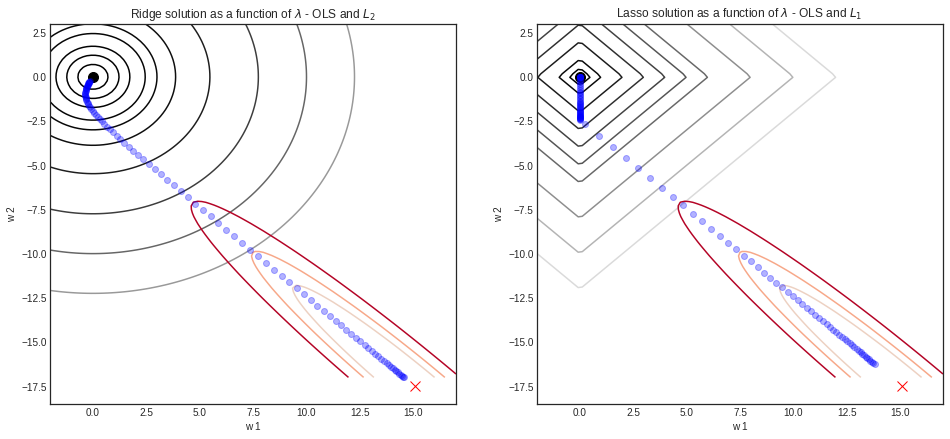

In [6]:
''' Complete the cell '''

#Setup of meshgrid of w values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each w combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T @ X) @X.T @ y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
''' FILL THIS CODE '''
#Plotting the path of L2 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##
ax.plot( ridge_l2_w0, ridge_l2_w1, linestyle = 'none', marker = 'o', color = 'blue', alpha = .3)

###############################################


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
''' FILL THIS CODE '''
#Plotting the path of L1 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##
ax.plot(lasso_l1_w0,lasso_l1_w1, linestyle = 'none', marker = 'o', color = 'blue', alpha = .3)
###############################################


plt.show()
